# Pandas - Xử lý dữ liệu

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 5. Thao tác trên chuỗi
Regular Expression <br>
**`df['year'].str.extract('RE')`**

In [2]:
dic = {
    'ten' : ['nam','hoa'],
    'diem':['Diem : 7','Diem : 10']
}

df = pd.DataFrame(dic)
df

,ten,diem
0,nam,Diem : 7
1,hoa,Diem : 10


In [3]:
df['toan'] = df['diem'].str.extract('(\d+)')
df

,ten,diem,toan
0,nam,Diem : 7,7
1,hoa,Diem : 10,10


In [4]:
dic = {
    'ten' : ['nam','hoa'],
    'diem':['Diem : 7.25','Diem : 10.0']
}

df = pd.DataFrame(dic)
df

,ten,diem
0,nam,Diem : 7.25
1,hoa,Diem : 10.0


In [6]:
df['toan'] = df['diem'].str.extract('(\d+\.\d+)')
df

,ten,diem,toan
0,nam,Diem : 7.25,7.25
1,hoa,Diem : 10.0,10.0


In [2]:
df = pd.read_excel('data/Diemthi_thpt_quocgia_2016.xlsx', sheet_name='Export Worksheet', engine='openpyxl')
df.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [4]:
df.loc[0,'DIEM_THI']

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [43]:
df['DIEM_THI'].str.extract('(Toán:\s{3}\d{1,2}\.\d{2})', expand=True)[0]

0        Toán:   2.00
1        Toán:   5.50
2        Toán:   4.50
3        Toán:   3.00
4        Toán:   2.25
             ...     
34821    Toán:   0.75
34822    Toán:   4.75
34823    Toán:   4.00
34824    Toán:   5.75
34825    Toán:   2.50
Name: 0, Length: 34826, dtype: object

In [32]:
# Lấy str cột DIEM_THI extract RE ra điểm
df['DIEM_THI'].str.extract('(Toán:\s{3}\d{1,2}\.\d{2})', expand=True)[0] \
.str.split(':   ', expand=True)[1]

0        2.00
1        5.50
2        4.50
3        3.00
4        2.25
         ... 
34821    0.75
34822    4.75
34823    4.00
34824    5.75
34825    2.50
Name: 1, Length: 34826, dtype: object

In [27]:
# Extract điểm danh sách các môn tổ chức thi
lst_mon = ['Toán', 'Ngữ văn', 'Địa lí', 'Lịch sử', 'Tiếng Anh', 'Sinh học', 'Vật lí', 'Hóa học']
for mon in lst_mon:
    df[mon] = df['DIEM_THI'].str.extract('(' + mon + ':\s{3}\d{1,2}\.\d{2})', expand=True)[0] \
    .str.split(':   ', expand=True)[1]
df.head(2)

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Toán,Ngữ văn,Địa lí,Lịch sử,Tiếng Anh,Sinh học,Vật lí,Hóa học
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,2.00,5.50,5.00,3.00,NaN,NaN,NaN,NaN
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,5.50,5.25,5.50,NaN,3.68,NaN,NaN,NaN


In [31]:
# Đổi kiểu cột sang dạng số
cols = ['Toán', 'Ngữ văn', 'Địa lí', 'Lịch sử', 'Tiếng Anh', 'Sinh học', 'Vật lí', 'Hóa học']
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SOBAODANH   34826 non-null  object 
 1   HO_TEN      34826 non-null  object 
 2   NGAY_SINH   34826 non-null  object 
 3   TEN_CUMTHI  34826 non-null  object 
 4   GIOI_TINH   34826 non-null  object 
 5   DIEM_THI    34826 non-null  object 
 6   Toán        34500 non-null  float64
 7   Ngữ văn     33894 non-null  float64
 8   Địa lí      22171 non-null  float64
 9   Lịch sử     3235 non-null   float64
 10  Tiếng Anh   30200 non-null  float64
 11  Sinh học    3571 non-null   float64
 12  Vật lí      10157 non-null  float64
 13  Hóa học     8097 non-null   float64
dtypes: float64(8), object(6)
memory usage: 3.7+ MB


## 6. Thao tác trên Timestamps

In [51]:
tags = pd.read_excel('data/movies.xlsx', sheet_name='tags', engine='openpyxl')
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [52]:
# Tạo cột kiểu datetime từ cột timestamp
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [53]:
# Lọc điều kiện dựa trên cột parsed_time
tags[tags['parsed_time'] > '2007-12-31']

,userId,movieId,tag,timestamp,parsed_time
8,15,100365,activist,1425876220,2015-03-09 04:43:40
9,15,100365,documentary,1425876220,2015-03-09 04:43:40
10,15,100365,uganda,1425876220,2015-03-09 04:43:40
12,68,2174,music,1249808064,2009-08-09 08:54:24
13,68,2174,weird,1249808102,2009-08-09 08:55:02
...,...,...,...,...,...
1291,660,135518,meaning of life,1436680885,2015-07-12 06:01:25
1292,660,135518,philosophical,1436680885,2015-07-12 06:01:25
1293,660,135518,sci-fi,1436680885,2015-07-12 06:01:25
1294,663,260,action,1438398078,2015-08-01 03:01:18


In [59]:
ratings = pd.read_excel('data/movies.xlsx', sheet_name='ratings', engine='openpyxl')
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp,parsed_time
0,1,31,2.5,1260759144,2009-12-14 02:52:24
1,1,1029,3.0,1260759179,2009-12-14 02:52:59
2,1,1061,3.0,1260759182,2009-12-14 02:53:02
3,1,1129,2.0,1260759185,2009-12-14 02:53:05
4,1,1172,4.0,1260759205,2009-12-14 02:53:25


In [60]:
# Lọc điều kiện dựa trên cột parsed_time
ratings[ratings['parsed_time'] > '2014-12-31'].sort_values(by='parsed_time', ascending=True).head()

,userId,movieId,rating,timestamp,parsed_time
80719,547,111622,4.0,1420131595,2015-01-01 16:59:55
95046,624,105954,3.0,1420150263,2015-01-01 22:11:03
95051,624,106491,2.0,1420388390,2015-01-04 16:19:50
95081,624,109853,2.0,1420392949,2015-01-04 17:35:49
80765,547,120821,4.5,1420455375,2015-01-05 10:56:15


In [64]:
# Tạo cột year, month
ratings['year'] = pd.DatetimeIndex(ratings['parsed_time']).year
ratings['month'] = pd.DatetimeIndex(ratings['parsed_time']).month
ratings['day'] = pd.DatetimeIndex(ratings['parsed_time']).day
ratings.head()

,userId,movieId,rating,timestamp,parsed_time,year,month,day
0,1,31,2.5,1260759144,2009-12-14 02:52:24,2009,12,14
1,1,1029,3.0,1260759179,2009-12-14 02:52:59,2009,12,14
2,1,1061,3.0,1260759182,2009-12-14 02:53:02,2009,12,14
3,1,1129,2.0,1260759185,2009-12-14 02:53:05,2009,12,14
4,1,1172,4.0,1260759205,2009-12-14 02:53:25,2009,12,14


In [67]:
# Thống kê mỗi năm có bao nhiêu lượt rating
ratings.groupby('year').size()

year
1995        3
1996     6239
1997     3294
1998     1825
1999     5901
2000    13869
2001     4658
2002     3938
2003     4462
2004     4658
2005     7161
2006     7493
2007     1548
2008     3676
2009     3434
2010     2518
2011     4450
2012     3849
2013     1969
2014     2224
2015     6610
2016     6225
dtype: int64

## 2. Trực quan hóa dữ liệu

### 2.1. Biểu đồ Bar plot
- So sánh giữa các category khác nhau

In [49]:
danso = pd.DataFrame({'tinh': ['Saigon', 'Hanoi', 'Bentre'], 'danso': [20, 10, 3]})
danso

,tinh,danso
0,Saigon,20
1,Hanoi,10
2,Bentre,3


<AxesSubplot:title={'center':'Biểu đồ dân số'}, xlabel='tinh'>

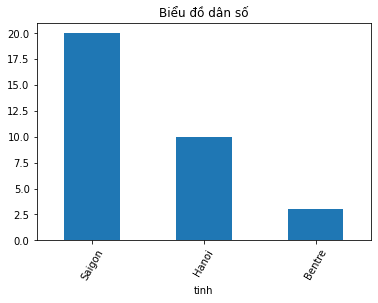

In [51]:
# Biểu đồ bar một category
danso.plot.bar(x='tinh', rot=60, title='Biểu đồ dân số', legend=False)

In [53]:
danso2 = pd.DataFrame({'tinh': ['Saigon', 'Hanoi', 'Bentre'], 'dansonam': [11, 5, 2], 'dansonu': [9, 5, 1]})
danso2

,tinh,dansonam,dansonu
0,Saigon,11,9
1,Hanoi,5,5
2,Bentre,2,1


<AxesSubplot:title={'center':'Biểu đồ dân số theo giới tính'}, xlabel='tinh'>

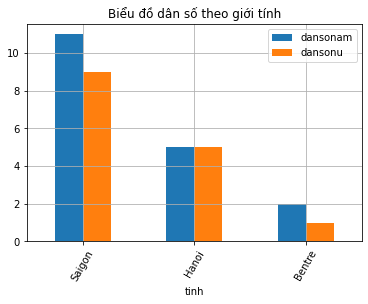

In [64]:
# Biểu đồ bar nhiều category
danso2.plot.bar(x='tinh', rot=60, title='Biểu đồ dân số theo giới tính', grid=True)

<AxesSubplot:title={'center':'Biểu đồ dân số theo giới tính'}, xlabel='tinh'>

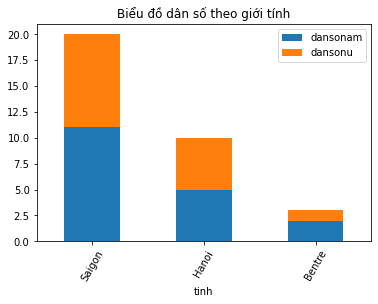

In [65]:
# Biểu đồ stack bar nhiều category
danso2.plot.bar(x='tinh', stacked=True, rot=60, title='Biểu đồ dân số theo giới tính')

### 2.2. Biểu đồ Box plot
- Dữ liệu tập trung ở giá trị nào
- IQR = Q3 - Q1
- Rau tren = Q3 + 1,5*IQR
- Rau duoi = Q1 - 1,5*IQR

In [71]:
lst = [74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 73, 75, 78, 79, 76, 74, 76, 72, 71, 75, 77, 74, 73, 74, 78, 73, 75, 73, 75, 75, 74, 69, 71, 74, 73, 73, 76, 74, 74, 70, 72, 77, 74, 70, 73, 75, 76, 76, 78, 74, 74, 76, 77, 81, 78, 75, 77, 75, 76, 74, 72, 72, 75, 73,  73, 73, 70, 70, 70, 76, 68, 71, 72, 75, 75, 75, 75, 68, 74, 78, 71, 73, 76, 74, 74, 79, 75, 73, 76, 74, 74, 73, 72, 74, 73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72, 72, 76, 74, 72, 77, 74, 77, 75, 76, 80, 74, 74, 75, 78, 73, 73, 74, 75, 76, 71, 73, 74, 76, 76, 74, 73, 74, 70, 72,  73, 73, 73, 73, 71, 74, 74, 72, 74, 71, 74, 73, 75, 75, 79, 73, 75, 76, 74, 76, 78, 74, 76, 72, 74, 76, 74, 75, 78, 75, 72, 74, 72, 74, 70, 71, 70, 75, 71, 71, 73, 72, 71, 73, 72, 75, 74, 74, 75, 73, 77, 73, 76, 75, 74, 76, 75, 73, 71, 76, 75, 72, 71, 77, 73, 74, 71, 72, 74, 75,    73, 72, 75, 75, 74, 72, 74, 71, 70, 74, 77, 77, 75, 75, 78, 75, 76, 73, 75, 75, 79, 77, 76, 71, 75, 74, 69, 71, 76, 72, 72, 70, 72, 73, 71, 72, 71, 73, 72, 73, 74, 74, 72, 75, 74, 74, 77, 75, 73, 72, 71, 74, 77, 75, 75, 75, 78, 78, 74, 76, 78, 76, 70, 72, 80, 74, 74, 71, 70, 72,    71, 74, 71, 72, 71, 74, 69, 76, 75, 75, 76, 73, 76, 73, 77, 73, 72, 72, 77, 77, 71, 74, 74, 73, 78, 75, 73, 70, 74, 72, 73, 73, 75, 75, 74, 76, 73, 74, 75, 75, 72, 73, 73, 72, 74, 78, 76, 73, 74, 75, 70, 75, 71, 72, 78, 75, 73, 73, 71, 75, 77, 72, 69, 73, 74, 72, 70, 75, 70, 72,    72, 74, 73, 74, 76, 75, 80, 72, 75, 73, 74, 74, 73, 75, 75, 71, 73, 75, 74, 74, 72, 74, 74, 74, 73, 76, 75, 72, 73, 73, 73, 72, 72, 72, 72, 71, 75, 75, 74, 73, 75, 79, 74, 76, 73, 74, 74, 72, 74, 74, 75, 78, 74, 74, 74, 77, 70, 73, 74, 73, 71, 75, 71, 72, 77, 74, 70, 77, 73, 72, 76, 71, 76, 78, 75, 73, 78, 74, 79, 75, 76, 72, 75, 75, 70, 72, 70, 74, 71, 76, 73, 76, 71, 69, 72, 72, 69, 73, 69, 73, 74, 74, 72, 71, 72, 72, 76, 76, 76, 74, 76, 75, 71, 72, 71, 73, 75, 76, 75, 71, 75, 74, 72, 73, 73, 73, 73, 76, 72, 76, 73, 73, 73, 75, 75, 77, 73, 72, 75, 70, 74, 72, 80, 71, 71, 74, 74, 73, 75, 76, 73, 77, 72, 73, 77, 76, 71, 75, 73, 74, 77, 71, 72, 73, 69, 73, 70, 74, 76, 73, 73, 75, 73, 79, 74, 73, 74, 77, 75, 74, 73, 77, 73, 77, 74, 74, 73, 77, 74, 77, 75, 77, 75, 71, 74, 70, 79, 72, 72, 70, 74, 74, 72, 73, 72, 74, 74, 76, 82, 74, 74, 70, 73, 73, 74, 77, 72, 76, 73, 73, 72, 74, 74, 71, 72, 75, 74, 74, 77, 70, 71, 73, 76, 71, 75, 74, 72, 76, 79, 76, 73, 76, 78, 75, 76, 72, 72, 73, 73, 75, 71, 76, 70, 75, 74, 75, 73, 71, 71, 72, 73, 73, 72, 69, 73, 78, 71, 73, 75, 76, 70, 74, 77, 75, 79, 72, 77, 73, 75, 75, 75, 73, 73, 76, 77, 75, 70, 71, 71, 75, 74, 69, 70, 75, 72, 75, 73, 72, 72, 72, 76, 75, 74, 69, 73, 72, 72, 75, 77, 76, 80, 77, 76, 79, 71, 75, 73, 76, 77, 73, 76, 70, 75, 73, 75, 70, 69, 71, 72, 72, 73, 70, 70, 73, 76, 75, 72, 73, 79, 71, 72, 74, 74, 74, 72, 76, 76, 72, 72, 71, 72, 72, 70, 77, 74, 72, 76, 71, 76, 71, 73, 70, 73, 73, 72, 71, 71, 71, 72, 72, 74, 74, 74, 71, 72, 75, 72, 71, 72, 72, 72, 72, 74, 74, 77, 75, 73, 75, 73, 76, 72, 77, 75, 72, 71, 71, 75,72, 73, 73, 71, 70, 75, 71, 76, 73, 68, 71, 72, 74, 77, 72, 76, 78, 81, 72, 73, 76, 72, 72, 74, 76, 73, 76, 75, 70, 71, 74, 72, 73, 76, 76, 73, 71, 68, 71, 71, 74, 77, 69, 72, 76, 75, 76, 75, 76, 72, 74, 76, 74, 72, 75, 78, 77, 70, 72, 79, 74, 71, 68, 77, 75, 71, 72, 70, 72, 72, 73, 72, 74, 72, 72, 75, 72, 73, 74, 72, 78, 75, 72, 74, 75, 75, 76, 74, 74, 73, 74, 71, 74, 75, 76, 74, 76, 76, 73, 75, 75, 74, 68, 72, 75, 71, 70, 72, 73, 72, 75, 74, 70, 76, 71, 82, 72, 73, 74, 71, 75, 77, 72, 74, 72, 73, 78, 77, 73, 73, 73, 73, 73, 76, 75, 70, 73, 72, 73, 75, 74, 73, 73, 76, 73, 75, 70, 77, 72, 77, 74, 75, 75, 75, 75, 72, 74, 71, 76, 71, 75, 76, 83, 75, 74, 76, 72, 72, 75, 75, 72, 77, 73, 72, 70, 74, 72, 74, 72, 71, 70, 71, 76, 74, 76, 74, 74, 74, 75, 75, 71, 71, 74, 77, 71, 74, 75, 77, 76, 74, 76, 72, 71, 72, 75, 73, 68, 72, 69, 73, 73, 75, 70, 70, 74, 75, 74, 74, 73, 74, 75, 77, 73, 74, 76, 74, 75, 73, 76, 78, 75, 73, 77, 74, 72, 74, 72, 71, 73, 75, 73, 67, 67, 76, 74, 73, 70, 75, 70, 72, 77, 79, 78, 74, 75, 75, 78, 76, 75, 69, 75, 72, 75, 73, 74, 75, 75, 73]
ser = pd.Series(lst)
ser

0       74
1       74
2       72
3       72
4       73
        ..
1010    73
1011    74
1012    75
1013    75
1014    73
Length: 1015, dtype: int64

<AxesSubplot:>

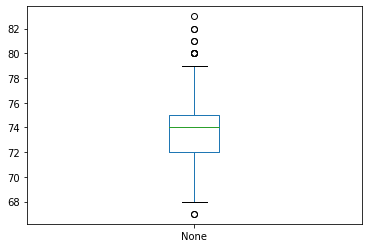

In [72]:
# Bieu do box plot
ser.plot.box()

In [73]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:title={'center':'age'}, xlabel='class'>

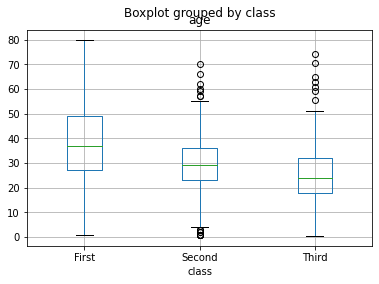

In [75]:
titanic.boxplot(by='class', column=['age'])

### 2.3. Biểu đồ Histogram
- Biểu diễn dạng phân phối tần suất của một tập dữ liệu liên tục

In [76]:
df = pd.DataFrame({'height': lst})
df.head()

,height
0,74
1,74
2,72
3,72
4,73


<AxesSubplot:ylabel='Frequency'>

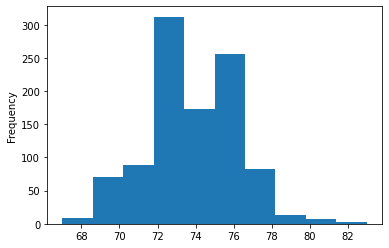

In [78]:
df.plot.hist(legend=False)

<AxesSubplot:ylabel='Frequency'>

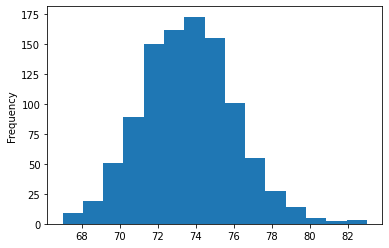

In [79]:
df.plot.hist(legend=False, bins=15)

<AxesSubplot:ylabel='Density'>

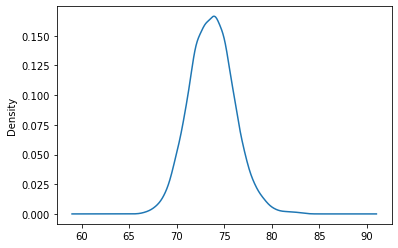

In [80]:
df.plot.kde(legend=False)

In [87]:
data = np.histogram(df['height'], bins = 10)
data

(array([  9,  70,  89, 312, 173, 256,  82,  14,   7,   3], dtype=int64),
 array([67. , 68.6, 70.2, 71.8, 73.4, 75. , 76.6, 78.2, 79.8, 81.4, 83. ]))

In [88]:
bin_ranges = data[1]
counts = data[0]
for i in range(1, len(bin_ranges)):
    j = i - 1
    print(bin_ranges[j], '-', bin_ranges[i], ':', counts[j])

67.0 - 68.6 : 9
68.6 - 70.2 : 70
70.2 - 71.8 : 89
71.8 - 73.4 : 312
73.4 - 75.0 : 173
75.0 - 76.6 : 256
76.6 - 78.2 : 82
78.2 - 79.8 : 14
79.8 - 81.4 : 7
81.4 - 83.0 : 3


### 2.3. Biểu đồ Plot

In [93]:
df = pd.read_csv('data/museum_visitors.csv', index_col='Date', parse_dates=True)
df.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


<AxesSubplot:xlabel='Date'>

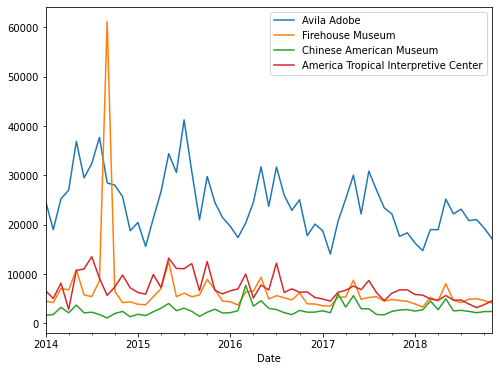

In [94]:
df.plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

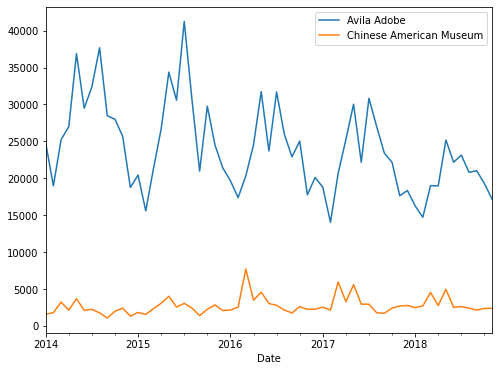

In [96]:
df[['Avila Adobe', 'Chinese American Museum']].plot(figsize=(8,6))